In [7]:
import os
import pickle
import json
import time
import pandas as pd
import cv2

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [43]:
print(f"train image 수 : {len(glob('./Training/images/*/*.jpg')):,}")
print(f"train image 수 : {len(glob('./Training/images/*/*.jpeg')):,}")
print(f"train label 수 : {len(glob('./Training/labels/*/*.json')):,}")

train image 수 : 247,867
train image 수 : 31,424
train label 수 : 279,311


In [9]:
print(f"valid image 수 : {len(glob('./Validation/images/*/*.jpg')):,}")
print(f"valid image 수 : {len(glob('./Validation/images/*/*.jpeg')):,}")
print(f"valid label 수 : {len(glob('./Validation/labels/*/*.json')):,}")

valid image 수 : 30,480
valid image 수 : 4,441
valid label 수 : 34,921


In [47]:
### Train data
start_time = time.time()
tr_json_list = glob('./Training/labels/*/*.json')
print(f"seconds : {time.time() - start_time}")

seconds : 13.300735473632812


In [48]:
### Train data
for i, json_file in enumerate(tqdm(tr_json_list)):
    with open(json_file, 'r') as f:
        json_file = json.load(f)

    json_file_re = {
        '파일이름' : json_file['description']['image'],
        '촬영일자' : json_file['description']['date'],
        'height' : json_file['description']['height'],
        'width' : json_file['description']['width'],
        '과제번호' : json_file['description']['task'],
        '촬영유형코드' : json_file['description']['type'],
        '질병/해충코드' : json_file['annotations']['disease'],
        '작물코드' : json_file['annotations']['crop'],
        '촬영부위코드' : json_file['annotations']['area'],
        '작물생육코드' : json_file['annotations']['grow'],
        '해충피해코드' : json_file['annotations']['risk'],
        'BoundingBox' : json_file['annotations']['points']
    }

    if i == 0:
        tr_json_df = pd.json_normalize(json_file_re)
        
    else:
        tr_json_df = pd.concat([tr_json_df, pd.json_normalize(json_file_re)])

tr_json_df = tr_json_df.reset_index(drop=True)

100%|████████████████████████████████████████████████████████████████████████| 279311/279311 [1:49:05<00:00, 42.67it/s]


In [49]:
### Valid data
start_time = time.time()
tr_json_list_vd = glob('./Validation/labels/*/*.json')
print(f"seconds : {time.time() - start_time}")

seconds : 2.5776963233947754


In [50]:
### Valid data
for i, json_file in enumerate(tqdm(tr_json_list_vd)):
    with open(json_file, 'r') as f:
        json_file = json.load(f)

    json_file_re = {
        '파일이름' : json_file['description']['image'],
        '촬영일자' : json_file['description']['date'],
        'height' : json_file['description']['height'],
        'width' : json_file['description']['width'],
        '과제번호' : json_file['description']['task'],
        '촬영유형코드' : json_file['description']['type'],
        '질병/해충코드' : json_file['annotations']['disease'],
        '작물코드' : json_file['annotations']['crop'],
        '촬영부위코드' : json_file['annotations']['area'],
        '작물생육코드' : json_file['annotations']['grow'],
        '해충피해코드' : json_file['annotations']['risk'],
        'BoundingBox' : json_file['annotations']['points']
    }

    if i == 0:
        tr_json_df_vd = pd.json_normalize(json_file_re)
        
    else:
        tr_json_df_vd = pd.concat([tr_json_df_vd, pd.json_normalize(json_file_re)])

tr_json_df_vd = tr_json_df_vd.reset_index(drop=True)

100%|███████████████████████████████████████████████████████████████████████████| 34921/34921 [03:45<00:00, 155.13it/s]


In [51]:
### Train data
display(tr_json_df.shape, tr_json_df.head())

(279311, 12)

,파일이름,촬영일자,height,width,과제번호,촬영유형코드,질병/해충코드,작물코드,촬영부위코드,작물생육코드,해충피해코드,BoundingBox
0,V006_79_0_00_01_01_13_0_a01_20201102_0000_S01_...,2020/11/02,3024,4032,79,0,0,1,1,13,0,"[{'xtl': 1118, 'ytl': 1294, 'xbr': 2900, 'ybr'..."
1,V006_79_0_00_01_01_13_0_a01_20201102_0002_S01_...,2020/11/02,3024,4032,79,0,0,1,1,13,0,"[{'xtl': 1033, 'ytl': 1533, 'xbr': 2829, 'ybr'..."
2,V006_79_0_00_01_01_13_0_a01_20201103_0001_S01_...,2020/11/03,3024,4032,79,0,0,1,1,13,0,"[{'xtl': 484, 'ytl': 1227, 'xbr': 3879, 'ybr':..."
3,V006_79_0_00_01_01_13_0_a01_20201103_0003_S01_...,2020/11/03,3024,4032,79,0,0,1,1,13,0,"[{'xtl': 1241, 'ytl': 103, 'xbr': 2344, 'ybr':..."
4,V006_79_0_00_01_01_13_0_a05_20201111_0000_S01_...,2020/11/11,3024,4032,79,0,0,1,1,13,0,"[{'xtl': 1382, 'ytl': 978, 'xbr': 3226, 'ybr':..."


In [52]:
### Valid data
display(tr_json_df_vd.shape, tr_json_df_vd.head())

(34921, 12)

,파일이름,촬영일자,height,width,과제번호,촬영유형코드,질병/해충코드,작물코드,촬영부위코드,작물생육코드,해충피해코드,BoundingBox
0,V006_79_0_00_01_01_13_0_a01_20201103_0000_S01_...,2020/11/03,3024,4032,79,0,0,1,1,13,0,"[{'xtl': 502, 'ytl': 1261, 'xbr': 3781, 'ybr':..."
1,V006_79_0_00_01_01_13_0_a01_20201103_0002_S01_...,2020/11/03,3024,4032,79,0,0,1,1,13,0,"[{'xtl': 817, 'ytl': 1564, 'xbr': 3693, 'ybr':..."
2,V006_79_0_00_01_01_13_0_a05_20201111_0009_S01_...,2020/11/11,3024,4032,79,0,0,1,1,13,0,"[{'xtl': 697, 'ytl': 967, 'xbr': 3797, 'ybr': ..."
3,V006_79_0_00_01_01_13_0_a05_20201111_0014_S01_...,2020/11/11,3024,4032,79,0,0,1,1,13,0,"[{'xtl': 627, 'ytl': 1294, 'xbr': 3783, 'ybr':..."
4,V006_79_0_00_01_01_13_0_a05_20201111_0024_S01_...,2020/11/11,3024,4032,79,0,0,1,1,13,0,"[{'xtl': 1002, 'ytl': 458, 'xbr': 3380, 'ybr':..."


In [53]:
tr_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279311 entries, 0 to 279310
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   파일이름         279311 non-null  object
 1   촬영일자         279311 non-null  object
 2   height       279311 non-null  int64 
 3   width        279311 non-null  int64 
 4   과제번호         279311 non-null  int64 
 5   촬영유형코드       279311 non-null  int64 
 6   질병/해충코드      279311 non-null  int64 
 7   작물코드         279311 non-null  int64 
 8   촬영부위코드       279311 non-null  int64 
 9   작물생육코드       279311 non-null  int64 
 10  해충피해코드       279311 non-null  int64 
 11  BoundingBox  279311 non-null  object
dtypes: int64(9), object(3)
memory usage: 25.6+ MB


In [54]:
tr_json_df_vd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34921 entries, 0 to 34920
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   파일이름         34921 non-null  object
 1   촬영일자         34921 non-null  object
 2   height       34921 non-null  int64 
 3   width        34921 non-null  int64 
 4   과제번호         34921 non-null  int64 
 5   촬영유형코드       34921 non-null  int64 
 6   질병/해충코드      34921 non-null  int64 
 7   작물코드         34921 non-null  int64 
 8   촬영부위코드       34921 non-null  int64 
 9   작물생육코드       34921 non-null  int64 
 10  해충피해코드       34921 non-null  int64 
 11  BoundingBox  34921 non-null  object
dtypes: int64(9), object(3)
memory usage: 3.2+ MB


In [55]:
crop_dict = {
    1 : '고추',
    2 : '무',
    3 : '배추',
    4 : '애호박',
    5 : '양배추',
    6 : '오이',
    7 : '토마토',
    8 : '콩',
    9 : '파',
    10 : '호박',
}

type_dict = {
    0 : '정상',
    1 : '질병',
    2 : '해충',
    3 : '충해'
}

disease_dict = {
    0 : '정상',
    1 : '고추탄저병',
    2 : '고추흰가루병',
    3 : '무검은무늬병',
    4 : '무노균병',
    5 : '배추검은썩음병',
    6 : '배추노균병',
    7 : '애호박노균병',
    8 : '애호박흰가루병',
    9 : '양배추균핵병',
    10 : '양배추무름병',
    11 : '오이노균병',
    12 : '오이흰가루병',
    13 : '콩불마름병',
    14 : '콩점무늬병',
    15 : '토마토잎마름병',
    16 : '파검은무늬병',
    17 : '파노균병',
    18 : '파녹병',
    19 : '호박노균병',
    20 : '호박흰가루병'
}

area_dict = {
    0 : '구분없음',
    1 : '열매',
    2 : '꽃',
    3 : '잎',
    4 : '가지',
    5 : '줄기',
    6 : '뿌리',
    7 : '해충'
}

grow_dict = {
    11 : '육묘기',
    12 : '생장기',
    13 : '착화/ 과실기'
}

risk_dict = {
    0 : '정상',
    1 : '초기',
    2 : '중기',
    3 : '말기'
}

task_dict = {
    77 : '시설 작물 질병',
    78 : '노지 작물 해충',
    79 : '노지 작물 질병',
    80 : '과수화상병'
}

In [56]:
### Train data
df = tr_json_df.astype({'질병/해충코드' : 'str', '작물코드' : 'str', '해충피해코드' : 'str'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279311 entries, 0 to 279310
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   파일이름         279311 non-null  object
 1   촬영일자         279311 non-null  object
 2   height       279311 non-null  int64 
 3   width        279311 non-null  int64 
 4   과제번호         279311 non-null  int64 
 5   촬영유형코드       279311 non-null  int64 
 6   질병/해충코드      279311 non-null  object
 7   작물코드         279311 non-null  object
 8   촬영부위코드       279311 non-null  int64 
 9   작물생육코드       279311 non-null  int64 
 10  해충피해코드       279311 non-null  object
 11  BoundingBox  279311 non-null  object
dtypes: int64(6), object(6)
memory usage: 25.6+ MB


In [57]:
### Valid data
df_vd = tr_json_df_vd.astype({'질병/해충코드' : 'str', '작물코드' : 'str', '해충피해코드' : 'str'})
df_vd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34921 entries, 0 to 34920
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   파일이름         34921 non-null  object
 1   촬영일자         34921 non-null  object
 2   height       34921 non-null  int64 
 3   width        34921 non-null  int64 
 4   과제번호         34921 non-null  int64 
 5   촬영유형코드       34921 non-null  int64 
 6   질병/해충코드      34921 non-null  object
 7   작물코드         34921 non-null  object
 8   촬영부위코드       34921 non-null  int64 
 9   작물생육코드       34921 non-null  int64 
 10  해충피해코드       34921 non-null  object
 11  BoundingBox  34921 non-null  object
dtypes: int64(6), object(6)
memory usage: 3.2+ MB


In [58]:
tr_json_df['label_code'] = df['작물코드'] + '_'  + df['질병/해충코드'] + '_' + df['해충피해코드']

tr_json_df['작물'] = tr_json_df['작물코드'].map(crop_dict) + '(' + tr_json_df['작물코드'].astype(str) + ')'
tr_json_df['질병명'] = tr_json_df['질병/해충코드'].map(disease_dict) + '(' + tr_json_df['질병/해충코드'].astype(str) + ')'
tr_json_df['피해정도'] = tr_json_df['해충피해코드'].map(risk_dict) + '(' + tr_json_df['해충피해코드'].astype(str) + ')'
tr_json_df['데이터종류'] = tr_json_df['과제번호'].map(task_dict) + '(' + tr_json_df['과제번호'].astype(str) + ')'
tr_json_df['촬영부위'] = tr_json_df['촬영부위코드'].map(area_dict) + '(' + tr_json_df['촬영부위코드'].astype(str) + ')'
tr_json_df['생육단계'] = tr_json_df['작물생육코드'].map(grow_dict) + '(' + tr_json_df['작물생육코드'].astype(str) + ')'

tr_json_df['label_name'] =  tr_json_df['작물'].astype(str) + '_'  + tr_json_df['질병명'] + '_' + tr_json_df['피해정도'].astype(str)

tr_json_df_vd['label_code'] = df_vd['작물코드'] + '_'  + df_vd['질병/해충코드'] + '_' + df_vd['해충피해코드']

tr_json_df_vd['작물'] = tr_json_df_vd['작물코드'].map(crop_dict) + '(' + tr_json_df_vd['작물코드'].astype(str) + ')'
tr_json_df_vd['질병명'] = tr_json_df_vd['질병/해충코드'].map(disease_dict) + '(' + tr_json_df_vd['질병/해충코드'].astype(str) + ')'
tr_json_df_vd['피해정도'] = tr_json_df_vd['해충피해코드'].map(risk_dict) + '(' + tr_json_df_vd['해충피해코드'].astype(str) + ')'
tr_json_df_vd['데이터종류'] = tr_json_df_vd['과제번호'].map(task_dict) + '(' + tr_json_df_vd['과제번호'].astype(str) + ')'
tr_json_df_vd['촬영부위'] = tr_json_df_vd['촬영부위코드'].map(area_dict) + '(' + tr_json_df_vd['촬영부위코드'].astype(str) + ')'
tr_json_df_vd['생육단계'] = tr_json_df_vd['작물생육코드'].map(grow_dict) + '(' + tr_json_df_vd['작물생육코드'].astype(str) + ')'

tr_json_df_vd['label_name'] =  tr_json_df_vd['작물'].astype(str) + '_'  + tr_json_df_vd['질병명'] + '_' + tr_json_df_vd['피해정도'].astype(str)

In [60]:
import collections

collections.Counter(tr_json_df['label_name'])

Counter({'고추(1)_정상(0)_정상(0)': 8575,
         '고추(1)_고추탄저병(1)_초기(1)': 737,
         '고추(1)_고추탄저병(1)_중기(2)': 2585,
         '고추(1)_고추탄저병(1)_말기(3)': 7381,
         '고추(1)_고추흰가루병(2)_초기(1)': 2112,
         '고추(1)_고추흰가루병(2)_중기(2)': 4433,
         '고추(1)_고추흰가루병(2)_말기(3)': 3520,
         '무(2)_정상(0)_정상(0)': 11001,
         '무(2)_무검은무늬병(3)_초기(1)': 6224,
         '무(2)_무검은무늬병(3)_중기(2)': 928,
         '무(2)_무검은무늬병(3)_말기(3)': 368,
         '무(2)_무노균병(4)_초기(1)': 2880,
         '무(2)_무노균병(4)_중기(2)': 736,
         '무(2)_무노균병(4)_말기(3)': 16,
         '배추(3)_정상(0)_정상(0)': 9318,
         '배추(3)_배추검은썩음병(5)_초기(1)': 4656,
         '배추(3)_배추검은썩음병(5)_중기(2)': 4976,
         '배추(3)_배추검은썩음병(5)_말기(3)': 3200,
         '배추(3)_배추노균병(6)_초기(1)': 4704,
         '배추(3)_배추노균병(6)_중기(2)': 2048,
         '배추(3)_배추노균병(6)_말기(3)': 576,
         '애호박(4)_정상(0)_정상(0)': 10562,
         '애호박(4)_애호박노균병(7)_초기(1)': 5328,
         '애호박(4)_애호박노균병(7)_중기(2)': 2480,
         '애호박(4)_애호박노균병(7)_말기(3)': 880,
         '애호박(4)_애호박흰가루병(8)_초기(1)'

# Class 분포 살펴보기

In [17]:
import platform
from matplotlib import font_manager, rc
import warnings
warnings.filterwarnings("ignore")

if platform.system() == 'Windows':
### 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

else:    
### Mac 인 경우
    rc('font', family='AppleGothic')

In [32]:
### Train
f, axs = plt.subplots(3,2,figsize=(20,30))
axs = axs.flatten()

for i, col in enumerate(['작물', '질병명', '피해정도', '촬영부위', '생육단계']):
    object_cnt = tr_json_df[col].value_counts().sort_values(ascending=False)
    axs[i].bar(object_cnt.index, object_cnt.values, color=['#d4dddd' if i%2==0 else '#F5DEB3' for i in range(9)])

    for x,y,z in zip(object_cnt.index, object_cnt.values,object_cnt.values/object_cnt.sum()*100):                                       # <--
        axs[i].annotate('%d\n(%d%%)' %(int(y),z), xy=(x,y+70), textcoords='data', ha = 'center') 

    axs[i].axis(ymin=0,ymax=int(max(object_cnt)*1.1))
    axs[i].set_xticklabels(object_cnt.index, rotation = 90, fontsize = 11)
    axs[i].set_title(col)
     
f.tight_layout()
# plt.show()
plt.savefig('./Class분포도_노지작물_train.png')

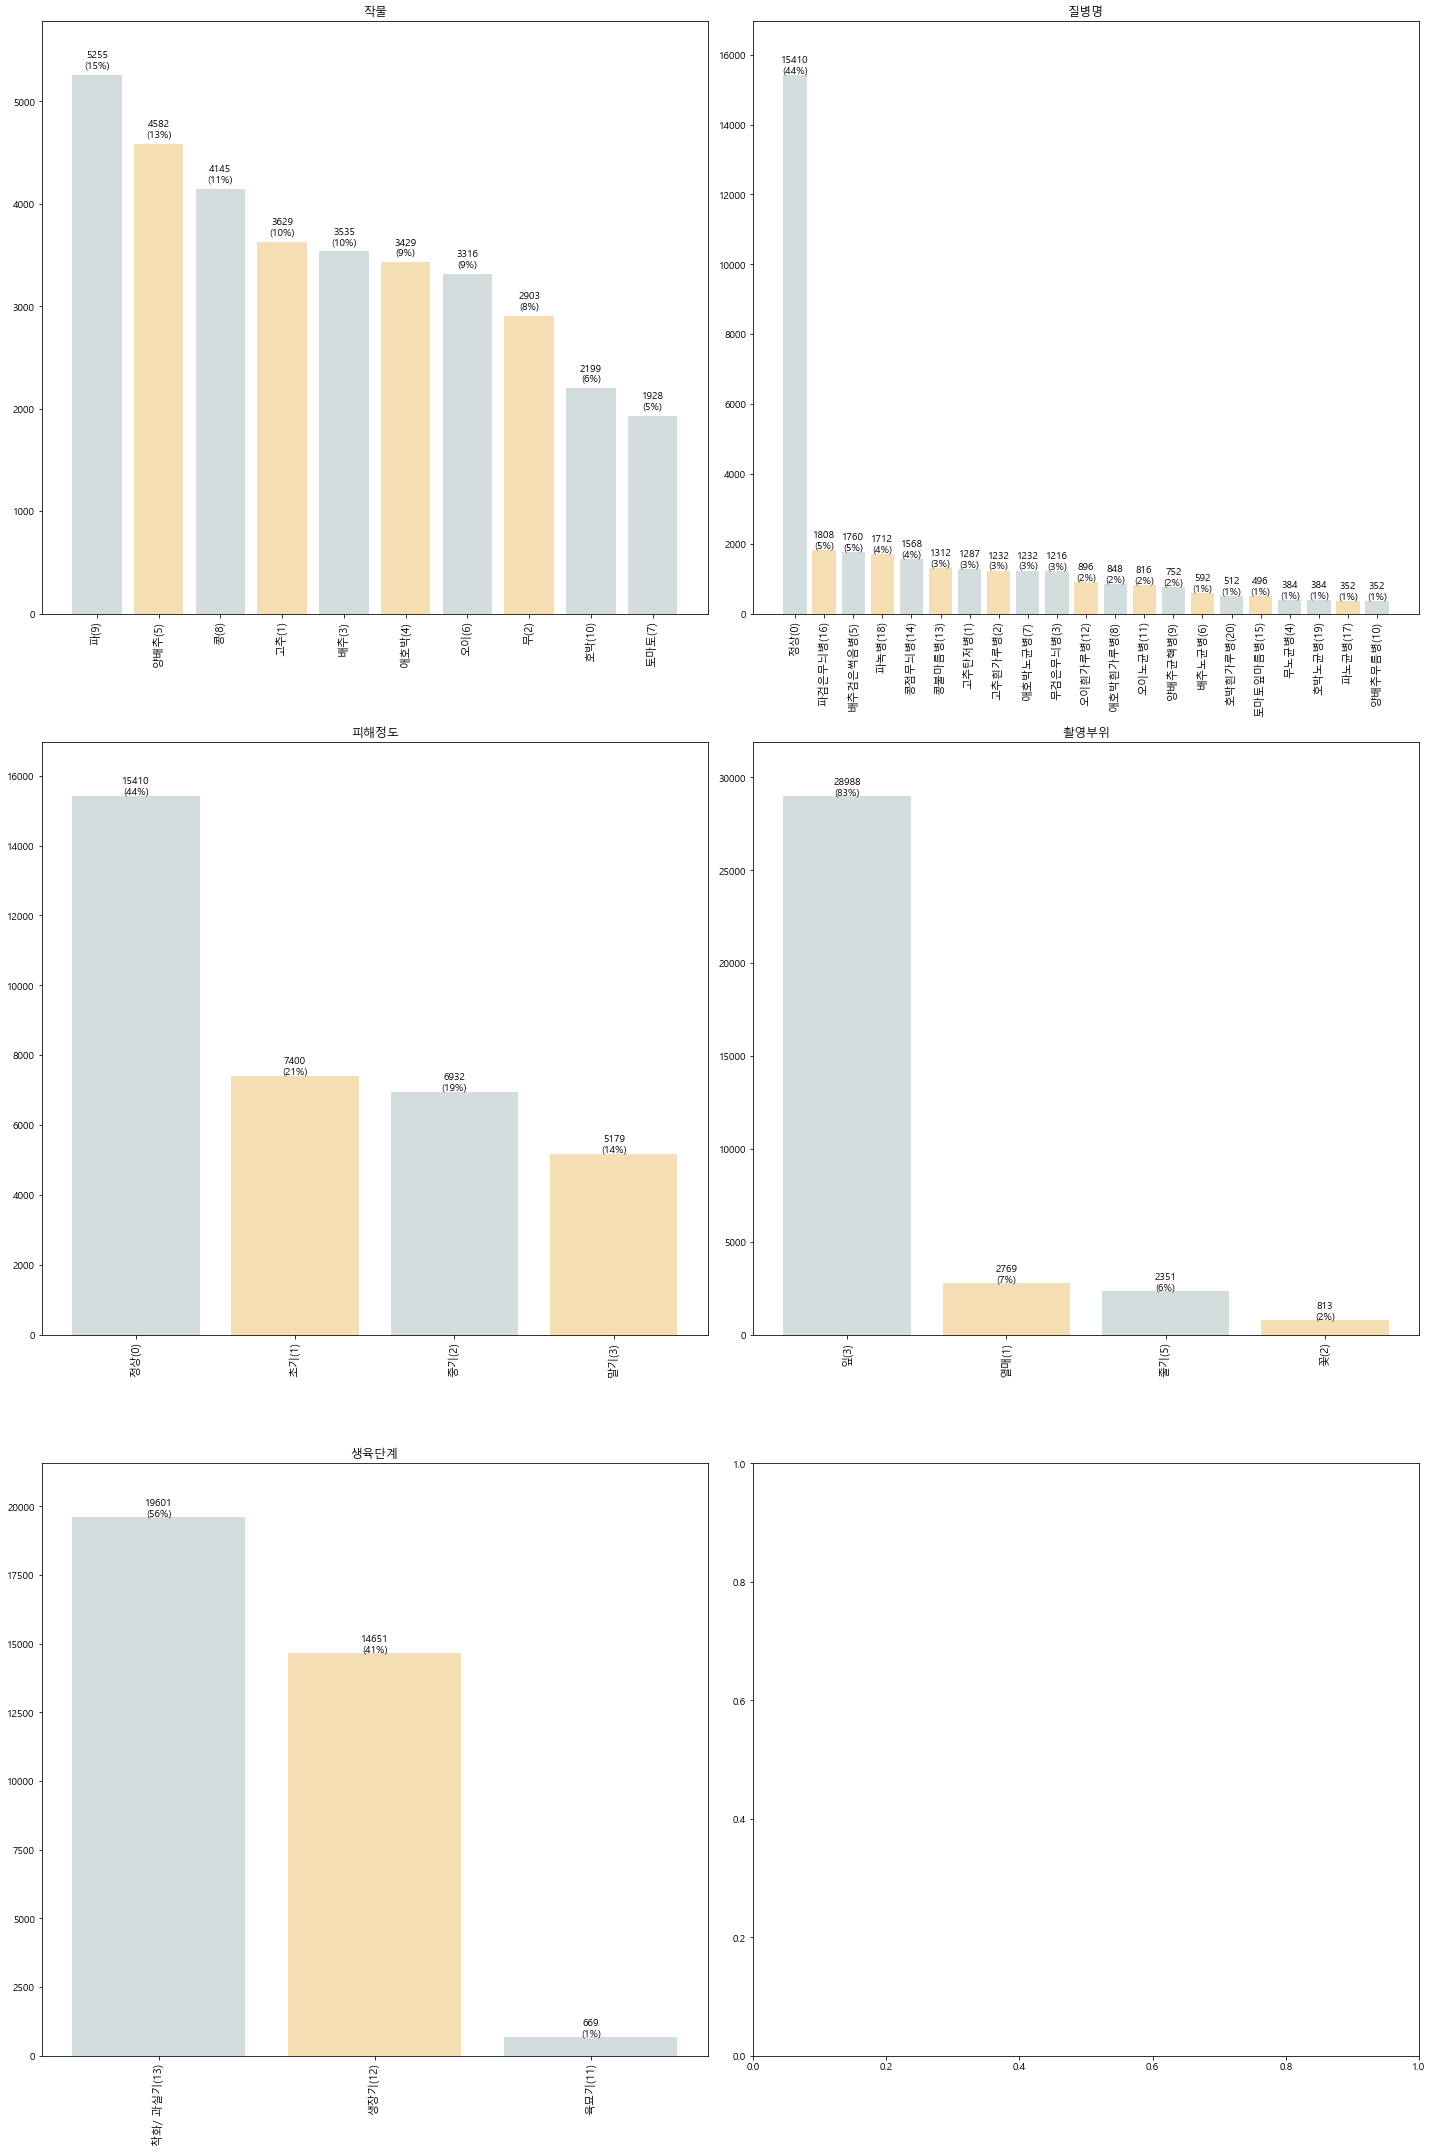

In [32]:
# Valid
f, axs = plt.subplots(3,2,figsize=(20,30))
axs = axs.flatten()

for i, col in enumerate(['작물', '질병명', '피해정도', '촬영부위', '생육단계']):
    object_cnt = tr_json_df_vd[col].value_counts().sort_values(ascending=False)
    axs[i].bar(object_cnt.index, object_cnt.values, color=['#d4dddd' if i%2==0 else '#F5DEB3' for i in range(9)])

    for x,y,z in zip(object_cnt.index, object_cnt.values,object_cnt.values/object_cnt.sum()*100):                                       # <--
        axs[i].annotate('%d\n(%d%%)' %(int(y),z), xy=(x,y+70), textcoords='data', ha = 'center') 

    axs[i].axis(ymin=0,ymax=int(max(object_cnt)*1.1))
    axs[i].set_xticklabels(object_cnt.index, rotation = 90, fontsize = 11)
    axs[i].set_title(col) 
    
f.tight_layout()
# plt.show()
plt.savefig('./Class분포도_노지작물_valid.png')

In [33]:
# Train
f, axs = plt.subplots(1,1,figsize=(15,8))
# axs = axs.flatten()

for i, col in enumerate(['label_name']):
    object_cnt = tr_json_df[col].value_counts().sort_values(ascending=False)
    axs.bar(object_cnt.index, object_cnt.values)

    for x,y,z in zip(object_cnt.index, object_cnt.values,object_cnt.values/object_cnt.sum()*100):                                       # <--
        axs.annotate('%d\n(%d%%)' %(int(y),z), xy=(x,y+30), textcoords='data', ha = 'center')

    axs.axis(ymin=0,ymax=int(max(object_cnt)*1.1))
    axs.set_xticklabels(object_cnt.index, rotation = 90)
    axs.set_title(col)
    
f.tight_layout()
# plt.show()
plt.savefig('./label_name분포도_노지작물')

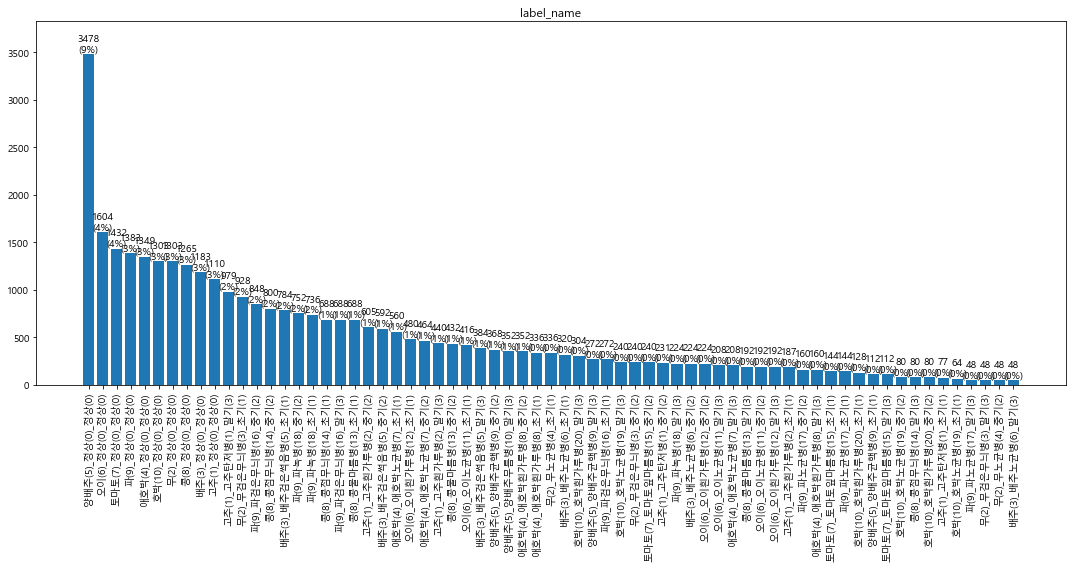

In [33]:
# Valid
f, axs = plt.subplots(1,1,figsize=(15,8))
# axs = axs.flatten()

for i, col in enumerate(['label_name']):
    object_cnt = tr_json_df_vd[col].value_counts().sort_values(ascending=False)
    axs.bar(object_cnt.index, object_cnt.values)

    for x,y,z in zip(object_cnt.index, object_cnt.values,object_cnt.values/object_cnt.sum()*100):                                       # <--
        axs.annotate('%d\n(%d%%)' %(int(y),z), xy=(x,y+30), textcoords='data', ha = 'center') 

    axs.axis(ymin=0,ymax=int(max(object_cnt)*1.1))
    axs.set_xticklabels(object_cnt.index, rotation = 90)
    axs.set_title(col)
    
f.tight_layout()
# plt.show()
plt.savefig('./label_name분포도_노지작물valid')

# 각 Class 별 관계도
## 작물 / 질병 / 피해정도 관계 비교

In [35]:
### Train
tmp = tr_json_df.groupby('작물')['질병명'].value_counts().rename('cnt').reset_index()
tmp2 = tr_json_df.groupby(['질병명'])['피해정도'].value_counts().rename('cnt').reset_index()

i = 0
tmp_dict = {}
for c_list in [tmp['작물'].unique(), tmp['질병명'].unique(), tmp2['피해정도'].unique()]:
    for x in c_list:
        tmp_dict[x] = i
        i+=1 

### Valid
tmp = tr_json_df_vd.groupby('작물')['질병명'].value_counts().rename('cnt').reset_index()
tmp2 = tr_json_df_vd.groupby(['질병명'])['피해정도'].value_counts().rename('cnt').reset_index()

i = 0
tmp_dict = {}
for c_list in [tmp['작물'].unique(), tmp['질병명'].unique(), tmp2['피해정도'].unique()]:
    for x in c_list:
        tmp_dict[x] = i
        i+=1 

In [36]:
import plotly.io as pio
pio.renderers.default = "notebook_connected" 

NODES = dict(label = list(tmp_dict.keys()),)
LINKS = dict(source = list(tmp['작물'].map(tmp_dict).values) + list(tmp2['질병명'].map(tmp_dict).values), 
        target = list(tmp['질병명'].map(tmp_dict).values) + list(tmp2['피해정도'].map(tmp_dict).values),
        value =  list(tmp['cnt'].values) + list(tmp2['cnt'].values),)

data = go.Sankey(node = NODES, link = LINKS)
fig = go.Figure(data)
fig.show()
fig.write_html('작물_질병_피해정도관계_노지작물_valid.html')

In [37]:
tmp = tr_json_df_vd.groupby('작물')['촬영부위'].value_counts().rename('cnt').reset_index()
tmp2 = tr_json_df_vd.groupby(['촬영부위'])['질병명'].value_counts().rename('cnt').reset_index()

i = 0
tmp_dict = {}
for c_list in [tmp['작물'].unique(), tmp['촬영부위'].unique(), tmp2['질병명'].unique()]:
    for x in c_list:
        tmp_dict[x] = i
        i+=1 
        
NODES = dict(label = list(tmp_dict.keys()),)
LINKS = dict(source = list(tmp['작물'].map(tmp_dict).values) + list(tmp2['촬영부위'].map(tmp_dict).values), 
        target = list(tmp['촬영부위'].map(tmp_dict).values) + list(tmp2['질병명'].map(tmp_dict).values), 
        value =  list(tmp['cnt'].values) + list(tmp2['cnt'].values),)

data = go.Sankey(node = NODES, link = LINKS)
fig = go.Figure(data)
fig.show()
fig.write_html('작물_촬영부위_질병관계_노지작물_valid.html')